In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

# Plot Colors
blue_color  = '#348ABD'
red_color   = '#A60628'

## Step 1:
### Init Network Topology and Electrostatic Properties:
- Network Topology either `"cubic"` or `"random"`
- `topology_parameter` defines network parameter via the following keys
- if `"cubic"`
    - `"Nx"`    :   Number of Nanoparticles in x-direction
    - `"Ny"`    :   Number of Nanoparticles in y-direction
    - `"Nz"`    :   Number of Nanoparticles in z-direction
    - `"e_pos"` :   Electrode positions as list of lists. Each element corresponds to nanoparticle position `[x,y,z]` which is attached to an electrode

- if `"random"`
    - `$N_{NP}$`    :   Number of Nanoparticles
    - `$N_{J}$`     :   Number of Junctions per Nanoparticle
    - `"e_pos"`     :   Electrode positions as list of lists. Each element corresponds to cartesian coordinates `[x,y]` of the specific electrode. Closest nanoparticle to this electrode will be attached to it

- `np_info` defines electrostatic properies via nanoparticle properties
    - `"eps_r"`         : relative permittivity of the insulating molecule
    - `"eps_s"`         : relative permittivity of the insulating SiO2 layer
    - `"mean_radius"`   : average nanoparticle radius [nm]
    - `"std_radius"`    : standard deviation nanopartcile radius [nm]  
    - `"np_distance"`   : spacing in between nanoparticles

In [16]:
# Example: Cubic Network
network_topology = "cubic"

# Network Parameter
topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[3,0,0],[6,0,0],[0,3,0],[0,6,0],[6,3,0],[3,6,0],[6,6,0]]
}

# Nanoparticle Parameter
np_info = {
    "eps_r"         : 2.6,
    "eps_s"         : 3.9,
    "mean_radius"   : 10.0,
    "std_radius"    : 0.0,
    "np_distance"   : 1.0
}

# Nanoparticle Resistances
res_info = {
    "mean_R"    : 25.0,
    "std_R"     : 0.0    
}

# Save Folder
folder  = ""

# Network Class Object
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter, folder=folder, np_info=np_info, res_info=res_info)

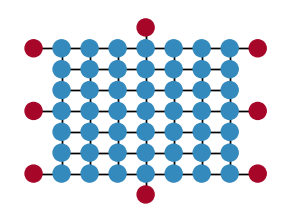

In [5]:
# Plot Network (blue : NP - red : Electrode)
fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=150)

In [49]:
V_vals = np.linspace(-0.1,0.1, 200, endpoint=True)
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter, folder=folder, np_info=np_info, res_info=res_info)

for V_val in V_vals:
    np_network_cubic.run_const_voltages(np.array([[V_val, V_val, V_val, V_val, V_val, V_val, V_val, 0.0, 0.0]]),7)

In [50]:
I_mean  = np_network_cubic.return_output_values()[:,2]
I_u     = np_network_cubic.return_output_values()[:,3]

<ErrorbarContainer object of 3 artists>

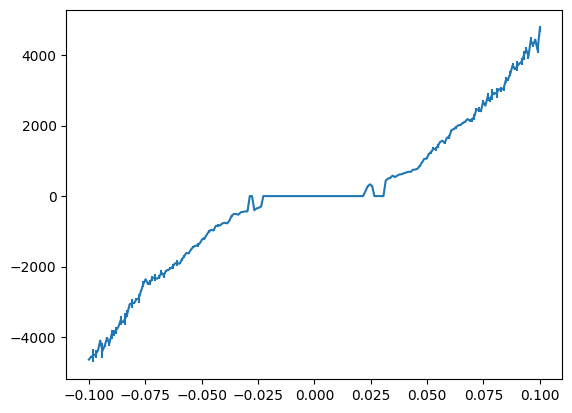

In [51]:
plt.errorbar(V_vals, I_mean, I_u)

In [4]:
# Example: Random Network
network_topology = "random"

# Network Parameter
topology_parameter  = {
    "Np"    : 50,
    "Nj"    : 4,
    "e_pos" : [[-1,-1],[-1,1],[1,-1],[1,1]]
}

# Nanoparticle Parameter
np_info = {
    "eps_r"         : 2.6,
    "eps_s"         : 3.9,
    "mean_radius"   : 10.0,
    "std_radius"    : 5.0,
    "np_distance"   : 1.0
}

# Nanoparticle Resistances
res_info = {
    "mean_R"    : 25.0,
    "std_R"     : 5.0    
}

# Save Folder
folder  = ""

# Network Class Object
np_network_random = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter, folder=folder, np_info=np_info, res_info=res_info)

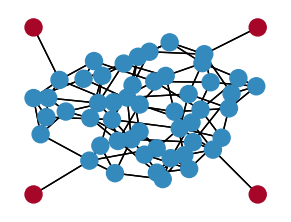

In [5]:
# Plot Network (blue : NP - red : Electrode)
fig, ax = nanonets_utils.display_network(np_network_sim=np_network_random, node_size=150)

## Step 2:
### Define Electrode Voltages
- Voltages are either constant in time or not
- In either case we need as many electrode voltages as there are electrodes connected to the network, otherwise --> Error
- Voltages are defined via an array
    - with columns corresponding to the electrode. First Column == First Electrode at position `topology_parameter['epos'][0]`
    - the last column corresponds to the gate electrode, which is electrostatic coupled to all nanopartciles, i.e. there **have to be** `N_electrodes + 1` in the voltage numpy array 
    - rows correspond either to the set of constant electrode voltages or to the voltage time series (first row = t0, second row = t1, ...)
    - most of the time there is an electrode referred as *output* which is generally grounded, i.e. $U = 0 V$
- In case of time dependent voltages one must also define a time scale as a simple 1D array

In [4]:
# Example: Constant Voltages
N_voltages      = 100
V_abs           = 0.1
voltages_const  = np.zeros(shape=(N_voltages, np_network_cubic.N_electrodes + 1))

# Electrode Voltages
voltages_const[:,0] = np.linspace(-0.1,0.1,N_voltages)
voltages_const[:,1] = np.repeat(0.05,N_voltages)
voltages_const[:,2] = np.repeat(-0.02,N_voltages)

print(voltages_const)

[[-0.1         0.05       -0.02        0.          0.        ]
 [-0.0979798   0.05       -0.02        0.          0.        ]
 [-0.0959596   0.05       -0.02        0.          0.        ]
 [-0.09393939  0.05       -0.02        0.          0.        ]
 [-0.09191919  0.05       -0.02        0.          0.        ]
 [-0.08989899  0.05       -0.02        0.          0.        ]
 [-0.08787879  0.05       -0.02        0.          0.        ]
 [-0.08585859  0.05       -0.02        0.          0.        ]
 [-0.08383838  0.05       -0.02        0.          0.        ]
 [-0.08181818  0.05       -0.02        0.          0.        ]
 [-0.07979798  0.05       -0.02        0.          0.        ]
 [-0.07777778  0.05       -0.02        0.          0.        ]
 [-0.07575758  0.05       -0.02        0.          0.        ]
 [-0.07373737  0.05       -0.02        0.          0.        ]
 [-0.07171717  0.05       -0.02        0.          0.        ]
 [-0.06969697  0.05       -0.02        0.          0.  

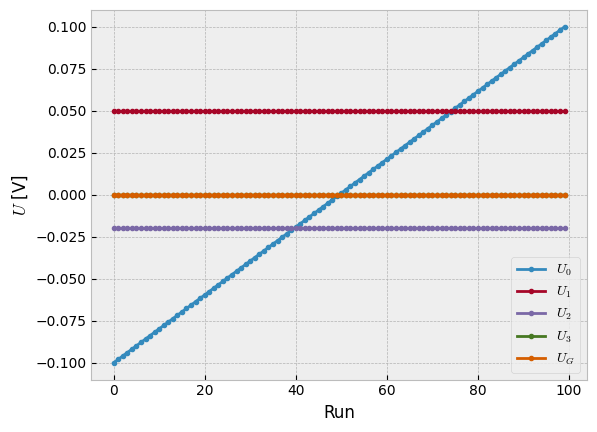

In [5]:
with plt.style.context("bmh"):
    
    plt.plot(voltages_const, '.-')
    plt.xlabel("Run")
    plt.ylabel("$U$ [V]")
    plt.legend(['$U_0$','$U_1$','$U_2$','$U_3$','$U_G$'])
    plt.show()

In [8]:
# Time Scale
step_size   = 1e-8
N_voltages  = 1000
time        = step_size*np.arange(N_voltages)

# Example: Time dependent Voltages
off_state       = 0.05
on_state        = 0.1
on_t1           = 0
on_t2           = int(N_voltages/4)
on_t3           = int(N_voltages/2)
on_t4           = int(3*N_voltages/4)
voltages_time   = np.zeros(shape=(N_voltages,np_network_random.N_electrodes+1))

# Input Electrode
voltages_time[:,0]              = np.repeat(off_state, N_voltages)
voltages_time[on_t1:on_t2,0]    = on_state
voltages_time[on_t3:on_t4,0]    = on_state
voltages_time[:,1]              = -0.04
voltages_time[:,2]              = 0.02

print(voltages_time)

[[ 0.1  -0.04  0.02  0.    0.  ]
 [ 0.1  -0.04  0.02  0.    0.  ]
 [ 0.1  -0.04  0.02  0.    0.  ]
 ...
 [ 0.05 -0.04  0.02  0.    0.  ]
 [ 0.05 -0.04  0.02  0.    0.  ]
 [ 0.05 -0.04  0.02  0.    0.  ]]


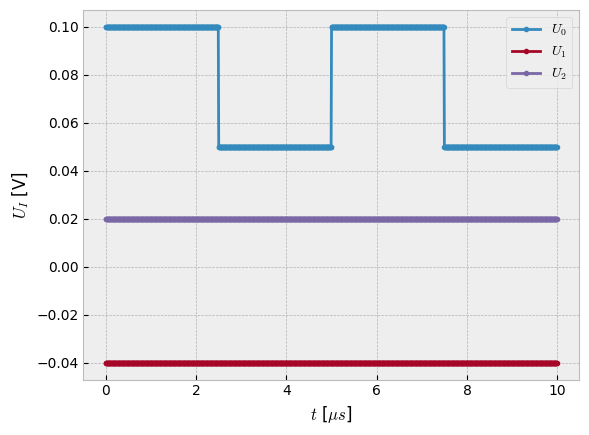

In [9]:
with plt.style.context("bmh"):
    
    plt.plot(time*10**6, voltages_time[:,0], '.-', label='$U_0$')
    plt.plot(time*10**6, voltages_time[:,1], '.-', label='$U_1$')
    plt.plot(time*10**6, voltages_time[:,2], '.-', label='$U_2$')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$U_I$ [V]")
    plt.legend()
    plt.show()

## Step 3:
### Run Simulation
- For const voltages `run_const_voltages()` and time dependent voltages `run_var_voltages()`
- `run_const_voltages()` arguments:
    - voltages          :   s.o
    - target_electrode  :   index of output electrode most of the time `N_electrodes - 1`
    - T_val             : Temperature
    - sim_dic           : dictonary containing information for simulation with keys
        - error_th  : desired relative error
        - max_jumps : maximum number of MC steps
        - eq_steps  : number of equilibration steps before production run
    - save_th   :   save results at each save_th step. If values should not be stored just choose save_th < 1
- `run_var_voltages()` arguments:
    - voltages          : s.o
    - time_steps        : s.o
    - target_electrode  : index of output electrode most of the time `N_electrodes - 1`
    - eq_steps          : number of equilibration steps before time starts
    - T_val             : Temperature
    - save_th           : save results at each save_th step.  If values should not be stored just choose save_th < 1
    - store_per_it_min  : at this time start to store all potential/charge distributions
    - store_per_it_max  : at this time stop to store all potential/charge distributions
    - init              : initialize the system or move on from current state

In [10]:
# Example: Const Voltage Simulation
target_electrode    = np_network_cubic.N_electrodes - 1
sim_dic             = {
    "error_th"    : 0.05,
    "max_jumps"   : 10000000,
    "eq_steps"    : 100000
} 

np_network_cubic.clear_outputs()
np_network_cubic.run_const_voltages(voltages=voltages_const, target_electrode=target_electrode, sim_dic=sim_dic, save_th=0.1)

In [10]:
const_outputs           =  pd.DataFrame(np.hstack([voltages_const,np_network_cubic.return_output_values()]))
const_outputs.columns   = [f"U_{i}" for i in range(np_network_cubic.N_electrodes)] + ["U_G", "eq_steps", "product_steps", "I", "u_I"]
const_outputs

,U_0,U_1,U_2,U_3,U_G,eq_steps,product_steps,I,u_I
0,-0.100000,0.05,-0.02,0.0,0.0,100000.0,33000.0,-218.393291,10.831011
1,-0.097980,0.05,-0.02,0.0,0.0,100000.0,40000.0,-215.249825,10.718920
2,-0.095960,0.05,-0.02,0.0,0.0,100000.0,2000.0,-143.223423,5.322214
3,-0.093939,0.05,-0.02,0.0,0.0,100000.0,2000.0,-209.726073,8.368023
4,-0.091919,0.05,-0.02,0.0,0.0,100000.0,39000.0,-184.272503,9.176834
...,...,...,...,...,...,...,...,...,...
95,0.091919,0.05,-0.02,0.0,0.0,100000.0,2000.0,306.687531,11.503879
96,0.093939,0.05,-0.02,0.0,0.0,100000.0,5000.0,278.987438,13.346210
97,0.095960,0.05,-0.02,0.0,0.0,100000.0,8000.0,339.930177,16.793674
98,0.097980,0.05,-0.02,0.0,0.0,100000.0,8000.0,335.699092,15.520268


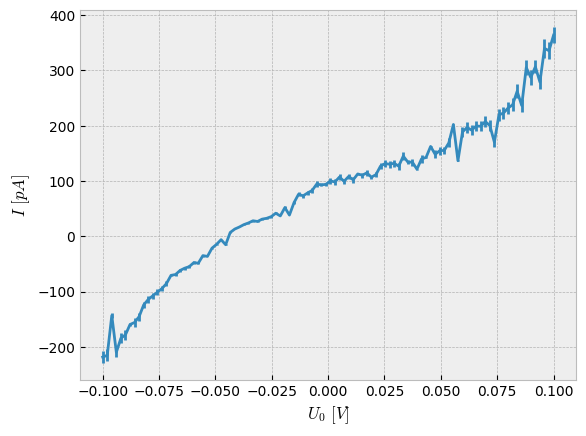

In [11]:
with plt.style.context("bmh"):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.errorbar(const_outputs['U_0'], const_outputs['I'], const_outputs['u_I'])
    ax.set_ylabel("$I$ $[pA]$")
    ax.set_xlabel("$U_0$ $[V]$")

In [24]:
# Example: Time dependent Voltage Simulation
target_electrode    = np_network_random.N_electrodes - 1
outputs             = []
stat_size           = 10

for _ in tqdm(range(stat_size)):
    
    np_network_random.clear_outputs()
    np_network_random.run_var_voltages(voltages=voltages_time, time_steps=time, target_electrode=target_electrode, save_th=0.1, eq_steps=10000)
    outputs.append(np_network_random.return_output_values())

100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


In [25]:
time_outpus         = pd.DataFrame(np.hstack([voltages_time[:-1,:],np.mean(outputs,axis=0)]))
time_outpus.columns = [f"U_{i}" for i in range(np_network_random.N_electrodes)] + ["U_G", "eq_steps", "product_steps", "I", "u_I"]
time_outpus['u_I']  = np.std(outputs, axis=0)[:,-2]/np.sqrt(stat_size)
time_outpus

,U_0,U_1,U_2,U_3,U_G,eq_steps,product_steps,I,u_I
0,0.10,-0.04,0.02,0.0,0.0,10000.0,423.2,882.297289,89.729979
1,0.10,-0.04,0.02,0.0,0.0,10000.0,406.8,751.263547,65.329258
2,0.10,-0.04,0.02,0.0,0.0,10000.0,408.6,772.147568,64.067931
3,0.10,-0.04,0.02,0.0,0.0,10000.0,403.3,712.454396,77.158668
4,0.10,-0.04,0.02,0.0,0.0,10000.0,412.2,791.286475,81.689660
...,...,...,...,...,...,...,...,...,...
994,0.05,-0.04,0.02,0.0,0.0,10000.0,163.1,30.258574,14.616593
995,0.05,-0.04,0.02,0.0,0.0,10000.0,160.5,30.058099,14.519470
996,0.05,-0.04,0.02,0.0,0.0,10000.0,164.7,20.100466,12.712758
997,0.05,-0.04,0.02,0.0,0.0,10000.0,169.6,0.029194,14.178020


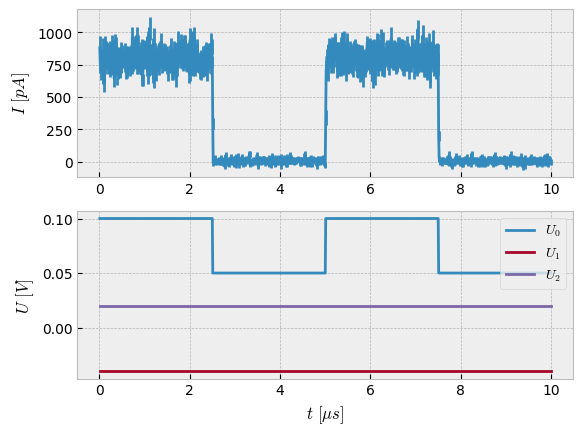

In [26]:
with plt.style.context("bmh"):

    fig = plt.figure()
    ax  = fig.add_subplot(2,1,1)
    ax.errorbar(time[1:]*10**6, time_outpus['I'], time_outpus['u_I'])
    ax.set_ylabel("$I$ $[pA]$")
    
    ax  = fig.add_subplot(2,1,2)
    ax.plot(time[1:]*10**6, time_outpus['U_0'], label='$U_0$')
    ax.plot(time[1:]*10**6, time_outpus['U_1'], label='$U_1$')
    ax.plot(time[1:]*10**6, time_outpus['U_2'], label='$U_2$')
    ax.set_xlabel("$t$ $[\mu s]$")
    ax.set_ylabel("$U$ $[V]$")
    ax.legend()

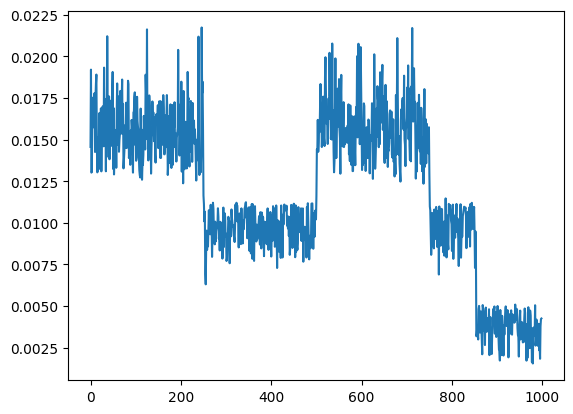

In [72]:
plt.plot(np_network_random.return_potential_landscape()[:,25])

In [ ]:
store_per_it_min    = 12e-6
store_per_it_max    = 14e-6
simulation_outputs  = run_simulation(voltages=voltages, time_steps=time_steps, target_electrode=N_electrodes-1,
                    network_topology=network_topology, topology_parameter=topology_parameter,
                    R=25.0, Rstd=5.0, store_per_it_min=store_per_it_min, store_per_it_max=store_per_it_max, start_val=start_val)

KeyboardInterrupt: 

In [ ]:
output_values               = pd.concat([pd.DataFrame(np.mean(simulation_outputs['output'],axis=0)),pd.DataFrame(np.std(simulation_outputs['output'],axis=0))/np.sqrt(len(simulation_outputs['output']))],axis=1)
output_values.columns       = ["Jumps","Current","Jumps_Error","Current_Error"] 
microstate                  = pd.DataFrame(np.mean(simulation_outputs["microstate"],axis=0))
microstate_error            = pd.DataFrame(np.std(simulation_outputs["microstate"],axis=0))/np.sqrt(len(simulation_outputs["microstate"]))
landscape                   = 1000*pd.DataFrame(np.mean(simulation_outputs["landscape"],axis=0))
landscape_error             = 1000*pd.DataFrame(np.std(simulation_outputs["landscape"],axis=0))/np.sqrt(len(simulation_outputs["landscape"]))
net_currents                = pd.DataFrame(np.mean(simulation_outputs["net_currents"],axis=0))
net_currents.columns        = simulation_outputs["net_currents"][0].columns
net_currents_error          = pd.DataFrame(np.std(simulation_outputs["net_currents"],axis=0))/np.sqrt(len(simulation_outputs["net_currents"]))
net_currents_error.columns  = simulation_outputs["net_currents"][0].columns

In [ ]:
print(f"Average Jumps per Step: {np.round(output_values['Jumps'].mean(),2)}")

Average Jumps per Step: 38.21


### Output electric Current

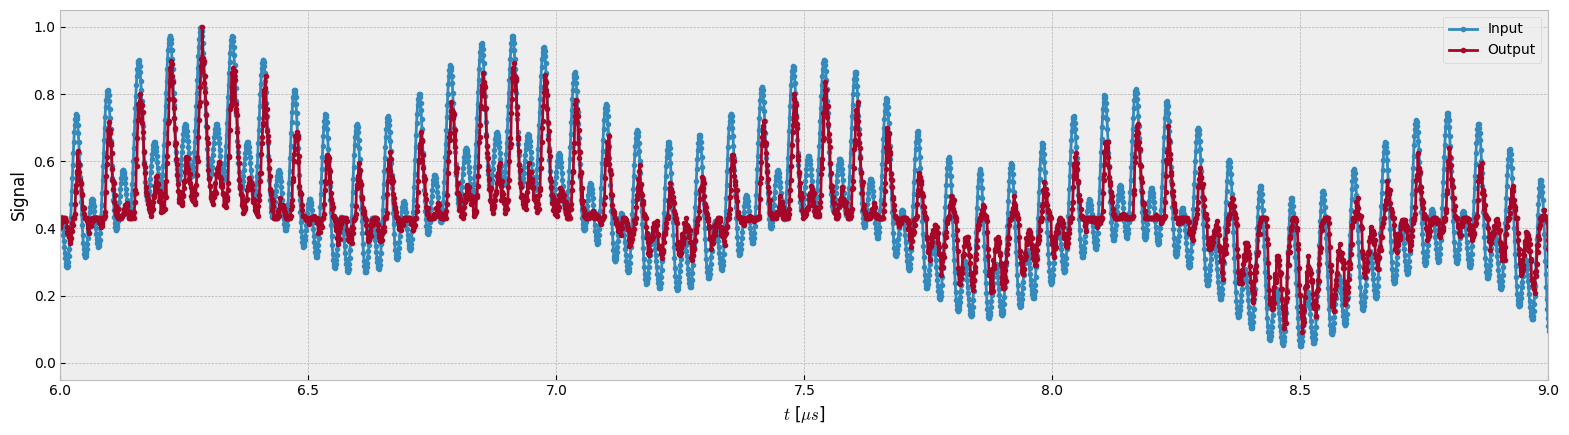

In [ ]:
normed_input    = (inputs - np.min(inputs))/(np.max(inputs)-np.min(inputs))
normed_output   = (output_values['Current'] - np.min(output_values['Current']))/(np.max(output_values['Current'])-np.min(output_values['Current']))

with plt.style.context("bmh"):

    fig = plt.figure()
    fig.set_figwidth(fig.get_figwidth()*3)
    fig.set_figheight(fig.get_figheight())
    ax  = fig.add_subplot()
    ax.plot(time, normed_input, '.-', label="Input")
    ax.plot(time, normed_output, '.-', label="Output")
    # ax.fill_between(x=time, y1=(output_values['Current']-output_values['Current_Error']), y2=(output_values['Current']+output_values['Current_Error']), alpha=0.8)
    # ax.plot(time, inputs, '.-', label="Input")
    ax.set_xlabel("$t$ [$\mu s$]")
    ax.set_ylabel("Signal")
    ax.legend()
    ax.set_xlim(6,9)
    
plt.show()

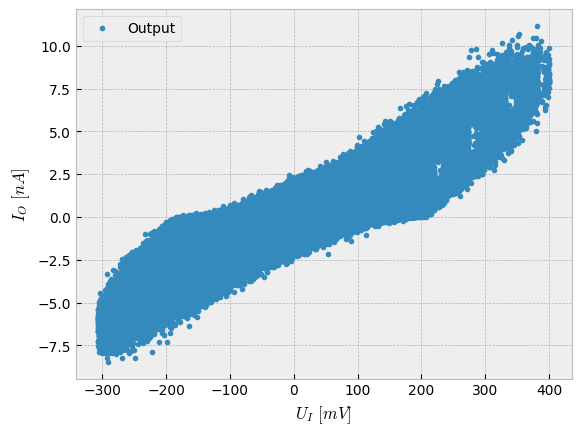

In [ ]:
with plt.style.context("bmh"):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.plot(inputs, output_values['Current'], '.', label="Output")
    # ax.plot(time, inputs, '.-', label="Input")
    ax.set_xlabel("$U_{I}$ $[mV]$")
    ax.set_ylabel("$I_O$ $[nA]$")
    ax.legend()


In [ ]:
plt.rcParams["animation.html"] = "jshtml"
from IPython.display import HTML

In [ ]:
output_values['Current']

0        2.214626
1        1.662930
2        1.327985
3        0.851101
4        1.092451
           ...   
99894    1.242040
99895    1.222593
99896    1.115048
99897    1.222163
99898    1.547790
Name: Current, Length: 99899, dtype: float64

MovieWriter ffmpeg unavailable; using Pillow instead.


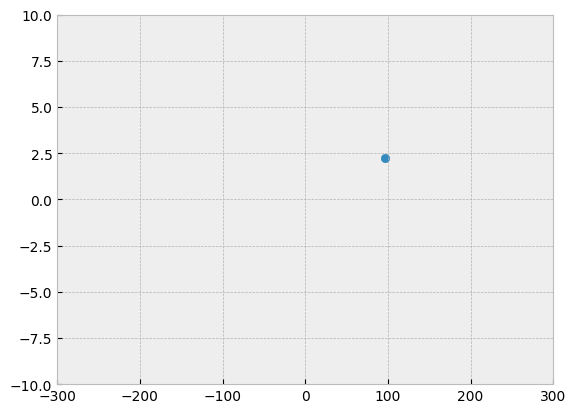

In [ ]:
with plt.style.context("bmh"):

    fig, ax = plt.subplots()
    ax.set_xlim(-300,300)
    ax.set_ylim(-10,10)

    scat = ax.scatter(inputs[0],output_values['Current'][0])

    def animate(i):
        scat.set_offsets((inputs[i],output_values['Current'][i]))
        return scat,

    ani = animation.FuncAnimation(fig, animate, repeat=True,
                                        frames=1000, interval=1)

ani.save("test.gif")

#### Micro State

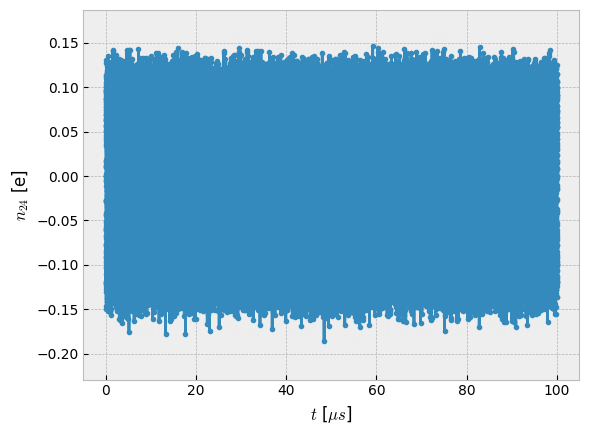

In [ ]:
np_index = 24

with plt.style.context("bmh"):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.plot(time, microstate[np_index], '.-')
    ax.fill_between(x=time, y1=(microstate[np_index]-microstate_error[np_index]), y2=(microstate[np_index]+microstate_error[np_index]), alpha=0.8)
    ax.set_xlabel("$t$ [$\mu s$]")
    ax.set_ylabel("$n_{"+f"{np_index}"+"}$ [e]")
    # ax.set_xscale('log')
    plt.show()

#### NP Potential

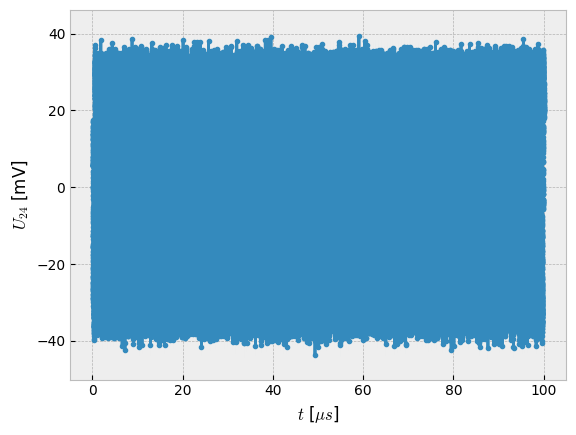

In [ ]:
np_index = 24

with plt.style.context("bmh"):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.plot(time, landscape[np_index], '.-')
    ax.fill_between(x=time, y1=(landscape[np_index]-landscape_error[np_index]), y2=(landscape[np_index]+landscape_error[np_index]), alpha=0.8)
    ax.set_xlabel("$t$ [$\mu s$]")
    ax.set_ylabel("$U_{"+f"{np_index}"+"}$ [mV]")
    # ax.set_xscale('log')
    plt.show()

### Potential and Jumps Evolution

In [ ]:
def return_auto_corr(time, arr, n_lags=20):

    time    = time - np.min(time)
    time    = time[:n_lags]
    a_c     = [1. if t==0 else np.corrcoef(arr[:-t],arr[t:])[0,1] for t in range(n_lags)]

    return time, a_c

def collect_auto_corr(time_evo, arr, t_range, n_stats=50, n_lags=20):

    corr    = pd.DataFrame()

    for i in range(n_stats):

        try:
            t, a_c  = return_auto_corr(time_evo[i], arr[i], n_lags=n_lags)
            func    = interp1d(t, a_c)

            corr[i] = func(t_range)
        except:
            pass
    
    return corr

In [ ]:
np_index        = 24
n_run           = 0
stored_indices  = np.where((time_steps >= store_per_it_min) & (time_steps < store_per_it_max))[0]
potential_evo   = [simulation_outputs["network_classes"][n_run].return_pot_per_it()[i][1:,np_index] for i in stored_indices]
time_evo        = [simulation_outputs["network_classes"][n_run].return_time_vals()[i][1:]*10**9 for i in stored_indices]

In [ ]:
def jump_diff(np_index, connected_nps):

    abgänge = []

    for i_np in connected_nps:

        jump_index      = np.where(net_currents.columns == (np_index,i_np))[0][0]
        jumps_evo       = [simulation_outputs["network_classes"][n_run].return_jumps_per_it()[i][1:,jump_index] for i in stored_indices]
        jumps_evo       = [np.insert((jumps_evo[i][1:] - jumps_evo[i][0:-1]),0,0) for i in range(len(stored_indices))]
        abgänge.append(jumps_evo)

    zugänge = []

    for i_np in connected_nps:

        jump_index      = np.where(net_currents.columns == (i_np,np_index))[0][0]
        jumps_evo       = [simulation_outputs["network_classes"][n_run].return_jumps_per_it()[i][1:,jump_index] for i in stored_indices]
        jumps_evo       = [np.insert((jumps_evo[i][1:] - jumps_evo[i][0:-1]),0,0) for i in range(len(stored_indices))]
        zugänge.append(jumps_evo)
    
    return np.sum(zugänge,axis=0) - np.sum(abgänge,axis=0)

jump_zu_ab = jump_diff(26, [1,21,25])

/home/jonasmensing/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
t_range_pot     = np.linspace(0,0.15,100)
t_range_jump    = np.linspace(0,0.15,100)
pot_auto_corr   = collect_auto_corr(time_evo, potential_evo, t_range_pot)
jump_auto_corr  = collect_auto_corr(time_evo, jump_zu_ab, t_range_jump)

/home/jonasmensing/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/jonasmensing/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/jonasmensing/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/jonasmensing/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/jonasmensing/.local/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/jonasmensing/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None

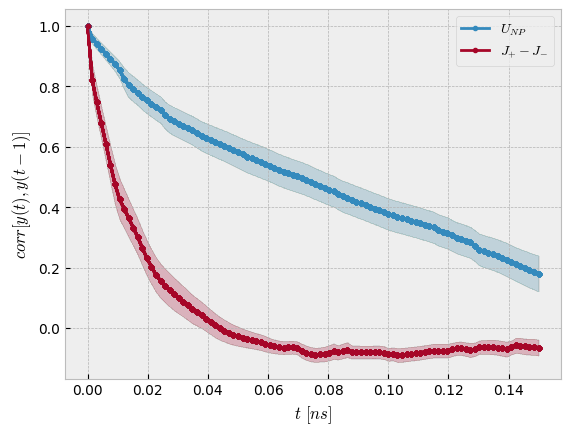

In [ ]:
y_pot   = pot_auto_corr.mean(axis=1)
y_jump  = jump_auto_corr.mean(axis=1)

y1_pot  = y_pot - pot_auto_corr.std(axis=1)/np.sqrt(len(pot_auto_corr.columns))
y2_pot  = y_pot + pot_auto_corr.std(axis=1)/np.sqrt(len(pot_auto_corr.columns))

y1_jump = y_jump - jump_auto_corr.std(axis=1)/np.sqrt(len(jump_auto_corr.columns))
y2_jump = y_jump + jump_auto_corr.std(axis=1)/np.sqrt(len(jump_auto_corr.columns))

with plt.style.context("bmh"):
    
    fig = plt.figure()
    ax  = fig.add_subplot()

    for i in range(20):

        ax.plot(t_range_pot, y_pot, '.-', c=blue_color, label='$U_{NP}$')
        ax.fill_between(t_range_pot, y1_pot, y2_pot, color=blue_color, alpha=0.01)

        ax.plot(t_range_jump, y_jump, '.-', c=red_color, label='$J_{+}-J_{-}$')
        ax.fill_between(t_range_jump, y1_jump, y2_jump, color=red_color, alpha=0.01)

        if i == 0:
            ax.legend()

    ax.set_ylabel("$corr[y(t),y(t-1)]$")
    ax.set_xlabel("$t$ $[ns]$")

plt.show()